# Анализ продажи компьютерных игр и выявлении популярного продукта

# Цель исследования
1. Выявить определяющие успешность игры закономерности;
2. Сделать ставку на потенциально популярный продукт;
3. Спланировать рекламные кампании.


# Ход исследования
Данные о продажах компьютерных игр мы получим из файла '/datasets/games.csv'. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. <br>
Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы будем искать возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее приступим к проведению исследовательского анализа.<br>

Таким образом, исследование пройдёт в девять этапов:<br>
• Обзор данных<br>
• Предобработка данных<br>
• Проведение анализа для выявления потенциально популярных платформ<br>
• Проведение анализа для для выявления потенциально популярных жанров<br>
• Проведение анализа для для выявления потенциально популярных регионов<br>
• Составления портрета пользователя каждого региона<br>
• Проверка гипотез<br>
• Написание промежуточных выводов<br>
• Написание общего вывода<br>

### Откройте файл с данными и изучите общую информацию

In [1]:
#Импортируем необходимые библиотеки в отдельной ячейке
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
#"Читаем" датафрейм 
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    pass

In [109]:
#Изучаем информацию о самом датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [110]:
#Выводим первые 15 строк таблицы для ознакомления
#data.sort_values(by='Name')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


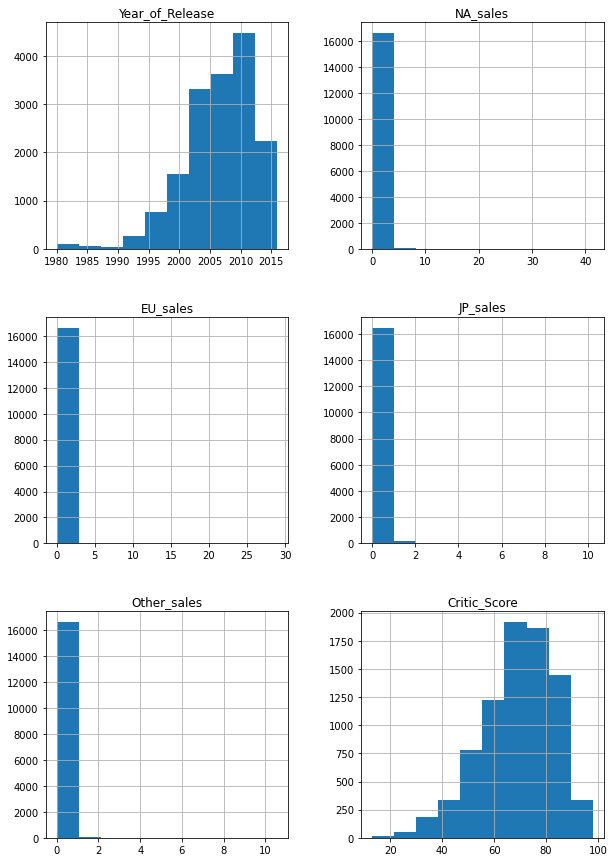

In [111]:
#Строим гистограммы для всех числовых столбцов таблицы 
data.hist(figsize=(10,15));

#### Вывод
Мы ознакомились с представленным датафреймом. 
Всего в датафрейме 11 столбцов и 16 715 записи. Во многих столбцах имеются пропущенные значения. Имеется некорректный тип данных у ряда значений. 

### Предобработка данных

In [112]:
#Заменяем названия столбцов (приводим к нижнему регистру)
data.columns = data.columns.str.lower()

In [113]:
#Преобразовываем данные в нужные типы
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#Проверяем изменения в типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### В каких столбцах мы заменили тип данных и почему

Мы обнаружили неккоректный тип данных в трех столбцах: <br>
• "Year_of_Release — год выпуска", необходимо изменить тип с вещественного числа на целое число, так как в данном столбце находится информация о годе выпуска, а год - это целое число, поэтому нам необхдимо изменить на корректный тип данных, чтобы в дальнейшем мы произвели корректный анализ на основе этих данных.<br>

• "User_Score — оценка пользователей (максимум 10)", необходимо изменить тип данных со строки, на вещественое число, так как в данном столбце нам представлен численный рейтинг пользователей, а не буквенный, поэтому нам необходимо изменить тип данных на корректный тип - вещественное число.

In [114]:
#Находим количество пропущенных значений в столбцах и изучаем их
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [115]:
#Проверяем колличество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [116]:
#Удаляем пропуск в столбце с названием игры
data = data.dropna(subset=['name'])
#Удаляем пропуск в столбце с жанром игры
data = data.dropna(subset=['genre'])
#Удаляем пропуск в столбце с годом выпуска
data = data.dropna(subset=['year_of_release'])
#Заполняем пропущенные значения в столбце rating
data['rating'] = data['rating'].fillna('no_rating')

#Проверяем на пропущенные значения
data.isna().sum()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


In [117]:
#Для столбца рейтинг смотрим с какой частотой встречаются различные значения рейтинга
data['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

Самым распространенным рейтингом является рейтинг Е.  <br>
Редкие значения приходятся на такие рейтинги как: <br>
ЕС - 8 значений; <br>
K-A - 3 значений; <br>
RP - 1 значение; <br>
АО - 1 значение.<br>
Так как редкие значения составляют пренебрежимо малую долю в данных - их можно удалить

In [118]:
#Удаляяем редкие значения 
data = data.drop(data[data['rating'] == 'EC'].index)
data = data.drop(data[data['rating'] == 'K-A'].index)
data = data.drop(data[data['rating'] == 'RP'].index)
data = data.drop(data[data['rating'] == 'AO'].index)
#Проверяем
data['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
Name: rating, dtype: int64

####  В каких столбцах мы обнаружили пропуски и как мы их заменили

Пропуски были обнаружены в следующих столбцах: <br>
"Name — название игры" (пропущенных значений - 2)<br>
"Genre — жанр игры" (пропущенных значений - 2)<br>
"Year_of_Release — год выпуска" (пропущенных значений - 269 (2%))<br>
"Critic_Score — оценка критиков" (пропущенных значений - 8 578 (51%))<br>
"User_Score — оценка пользователей" (пропущенных значений - 6 701 (55%))<br>
"Rating — рейтинг от организации ESRB" (пропущенных значений - 6 766 (40%))<br>

Мы удалили пропуски в следующих столбцах: "name", "genre", "year_of_release", так как если пропуски составляют менее 5% от всего датафрейма - проще их сразу удалить. <br>
Пропуски в столбцах "critic_score", "user_score", мы оставим без заполнения пропусков, так как многие пропуски в колличественных столбцах лучше оставить или удалить, чем заполнять их "рандомом". Удалить в данном случае мы не можем, потому что пропуски составляют почти половину датафйрема и если мы удалим пропуски - мы можем потерять важную часть данных.<br>
Значения в столбце "rating" является категориальными, поэтому пропуски в этом столбце мы заменим на значение "no_rating" (англ. без рейтинга).

#### Причины, которые могли привести к пропускам

1. Пропуски в данных могли возникнуть из-за того, что некоторые пользователи не ставили свои оценки играм (не хотели, либо могли забыть поставить), тоже самое касается и критиков - не все критики смогли оценить, либо не захотели оставлять свою оценку;
2. При переносе данных в "читебельный" вид для аналитика произошла ошибка и данные подтянулись неккоректно;
3. Не все открытые источники захотели давать полную инофрмацию о данных.

In [119]:
#Проверяем количество явных дубликатов
data.duplicated().sum()

0

Дубликатов не выявлено

In [120]:
#Создаем функцию для проверки уникальных значений в каждом столбце
def unique(data):
    for column in data.columns:
        print('Уникальные значения столбца', column)
        print(data[column].unique())

In [121]:
unique(data)

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца year_of_release
<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Уникальные значения столбца na_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.

"Выбивающихся" значений не выявлено

In [122]:
#Земеняем аббревиатуру 'tbd' в столбце с оценкой пользователей на пропущенные значения (Nan)
data['user_score'] = data['user_score'].replace('tbd', 'Nan')

#### Аббревиатрура "tbt" в столбце с оценкой пользователей

Аббревиатрура "tbt", которая находится в столбце с оценкой пользователей, в английском языке означает (To Be Confirmed) -  "подлежит подтверждению/уточнению".<br>
То есть, нахождение такой аббреввиатуры в столбце означает, что данные об оценке не уточнены у пользователя и ждут подтверждения для выставления, то есть эти данные на самом деле пропущены. Данное значение можно обработать, заменив на пропущенные значения (Nan), которых в столбце подавляющее большинство.

In [123]:
#Cчтитаем суммарные продажи во всех регионах и записываем их в отдельный столбец
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Юлия, большое спасибо за ценную подсказку по улучшению кода! ^^

#### Вывод
Мы провели полноценную предобработку данных:
1. Проверили столбцы на наличие дубликатов
2. Проверили столбцы на уникальные значения
3. Привели названия столбцов к нижнему регистру
4. Провели замену типа данных, где это требовалось
5. Заменили пропущенные значения там, где это было возможно
6. Провели анализ аббревиатуры "tbt"
7. Добавили новый столбец в таблицу
8. Установили возможные причины пропусков в значениях

Мы обнаружили неккоректный тип данных в трех столбцах: <br>
• "Year_of_Release — год выпуска"<br>
• "User_Score — оценка пользователей (максимум 10)" <br>

Мы удалили пропуски в следующих столбцах: "name", "genre", "year_of_release", так как если пропуски составляют менее 5% от всего датафрейма - проще их сразу удалить. <br>
Пропуски в столбцах "critic_score", "user_score", мы оставим без заполнения пропусков, так как многие пропуски в колличественных столбцах лучше оставить или удалить, чем заполнять их "рандомом". <br>
Значения в столбце "rating" является категориальными, поэтому пропуски в этом столбце мы заменим на значение "no_rating" (англ. без рейтинга).<br>

Аббревиатрура "tbt" в столбце с оценкой пользователей в английском языке означает (To Be Confirmed) - "подлежит подтверждению/уточнению".То есть, нахождение такой аббреввиатуры в столбце означает, что данные об оценке не уточнены у пользователя и ждут подтверждения для выставления, то есть эти данные на самом деле пропущены. Данную аббревиатуру мы заменили на пропущенное значение Nan.

Подводя итог, можно сказать, что мы завершили предобработку данных, проведя проверку на дубликаты и пропущенные значения и устранив их. В процессе предобработки из 16 715 строк, у нас осталось 16 444 строки.


###  Исследовательский анализ данных

In [124]:
#Группируем данные, чтобы выяснить, сколько игр выпускалось в разные годы
games_in_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
#Переименовываем столбец
games_in_year.columns = ['games']
games_in_year

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


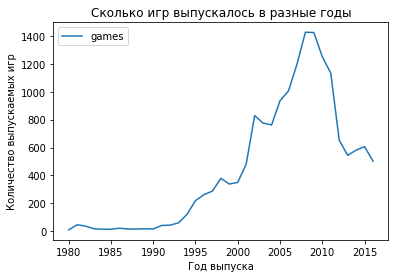

In [125]:
#Строим график и проводим оценку - сколько игр выпускалось в разные годы
games_in_year.plot().set_title('Сколько игр выпускалось в разные годы');

#Добавляем заголовки для осей
plt.ylabel('Количество выпускаемых игр');
plt.xlabel('Год выпуска');

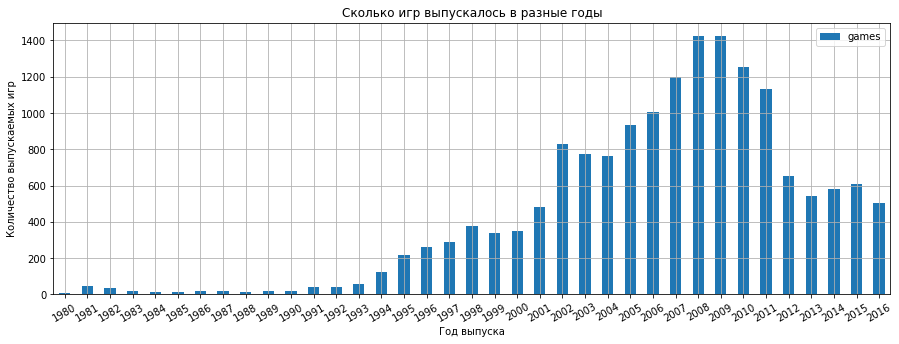

In [126]:
#Строим столбчатый график и проводим оценку - сколько игр выпускалось в разные годы
games_in_year.plot(kind='bar', figsize=(15,5), grid=True, rot=30).set_title('Сколько игр выпускалось в разные годы');

#Добавляем заголовки для осей
plt.ylabel('Количество выпускаемых игр');
plt.xlabel('Год выпуска');

Рассматривая графики, можно сделать вывод о том, что до 1995 года выпускалось меньше 200 игр, после 1995 года мы видим наращивание выпусков игр каждый год, пик выпуска игр приходится на 2008-2009 года, в это время выпустили 1 427 и 1 426 игр соответсвенно. После пошел спад и в период с 2012 по 2016 года мы наблюдаем однорудную тенденцию выпуска игр - примерно 500-600 игр за год.

#### Важны ли данные за все периоды:
Рассматривать данные за все представленные периоды (с 1980 по 2016) слишком громоздко и нет необходимости брать все годы на рассмотрение, так как для формировании стратегии на будущие года - нам необходимо взять самые "свежие" данные и даты, поэтому  достаточно взять данные за последние 5 лет (с 2012 по 2016 гг.). 

In [127]:
#Изучаем и группируем продажи по платформам за каждый год
platform_in_year = data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
platform_in_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#Группируем данные, чтобы выяснить, как менялись продажи по платформам
platform_total_sales = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

#Выбираем топ-10 платформ с наибольшими суммарными продажами
platform_top_10 = platform_total_sales.query('total_sales > 257.0')
print(platform_top_10)

#C помощью метода where() - сравниваем индексы и группируем данные
stat_top_10 = data.where(data['platform'].isin(platform_top_10.index))
stat_top_10 = stat_top_10.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

          total_sales
platform             
PS2           1233.32
X360           961.24
PS3            931.34
Wii            890.52
DS             802.13
PS             725.67
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81


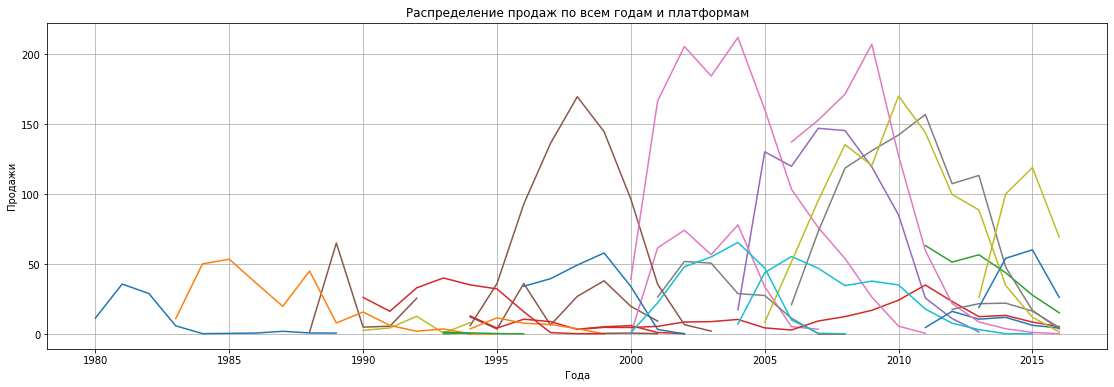

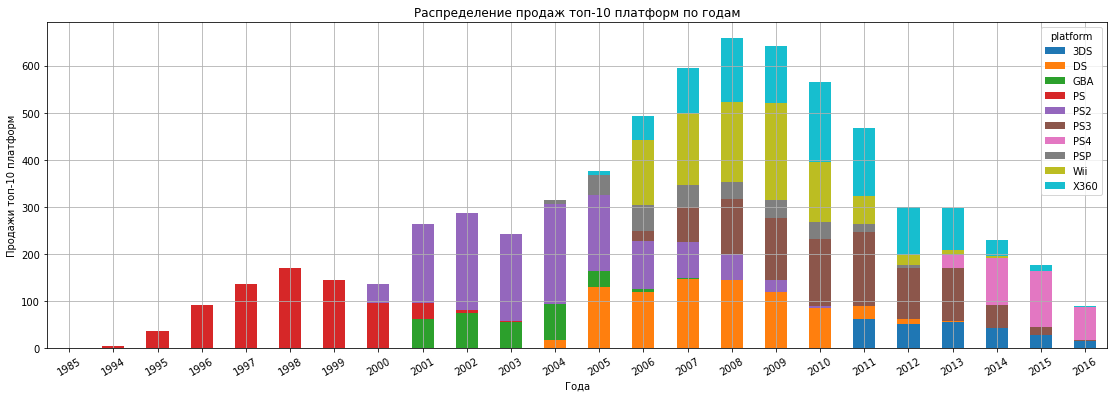

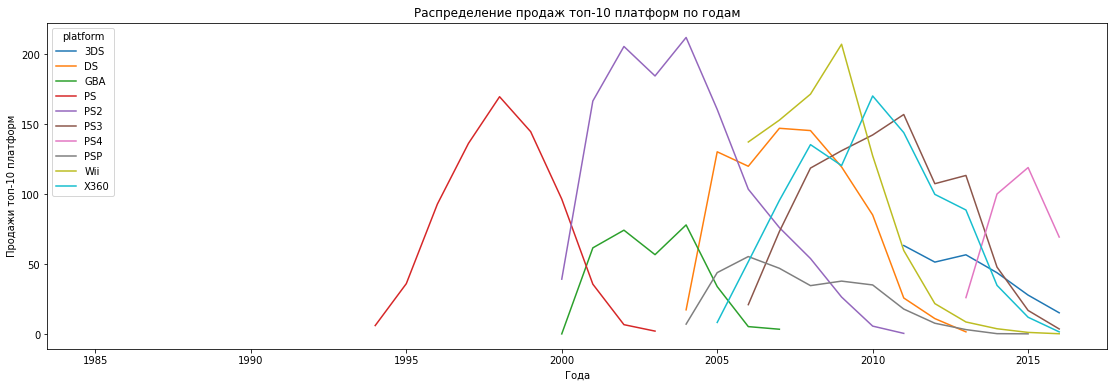

In [129]:
#Строим распределение продаж по годам
platform_in_year.plot(figsize=(19,6), legend=False, grid=True, 
                      title='Распределение продаж по всем годам и платформам',
                      xlabel='Года', ylabel='Продажи');
stat_top_10.plot(kind='bar',
                stacked=True, 
                figsize=(19,6), 
                grid=True, rot=30, 
                title='Распределение продаж топ-10 платформ по годам', 
                xlabel='Года', ylabel='Продажи топ-10 платформ');
stat_top_10.plot(figsize=(19,6), xlabel='Года', ylabel='Продажи топ-10 платформ', 
                 title='Распределение продаж топ-10 платформ по годам');

На первом графике "Распределение продаж по всем годам" мы можем наблюдать, что "большие" продажи платформ начались с 1995 года и продолжались до 2010 года, однако с 2010 года, как мы видим на графиках, - продаж стало меньше.
Пик продаж на платформах пришелся на 2008 год. Самые большие продажи пришлись на период с 2006 по 2011 год - как раз то время, когда выпускалось много игр. <br>
Мы выявили топ-10 платформ с самыми большими продажами: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. Самыми популярными из них считаются PS2, X360, PS3. Это довольно сильные конкуренты для других платформ и сильные для самих себя, так как эти "гиганты" помимо получения большинства продаж, так же долго находились/находятся среди популярных платформ.
Рассматривая 2016 год, можно заменить, что популярность по продажам приобрела "новая" платформа PS4, которая не появлялась до этого среди популярных платформ, так же можно заметить, что эта платформа в последние четыре года набирает обороты и обгоняет своих конкурентов по продажам. 

#### За какой характерный срок появляются новые и исчезают старые платформы:

Исходя из графика, в среднем за 8-11 лет появляются новые и исчезают старые платформы. Пик популярности у платформ в среднем приходится на 5-6 года.

#### Актуальный период
Актуальным периодом, который нам поможет построить прогноз на 2017 год, будем считать данные за последние 5 лет (с 2012 по 2016гг)

In [130]:
#Сделаем срез по акутальным годам 
current_period = data.query('year_of_release >= 2012')
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


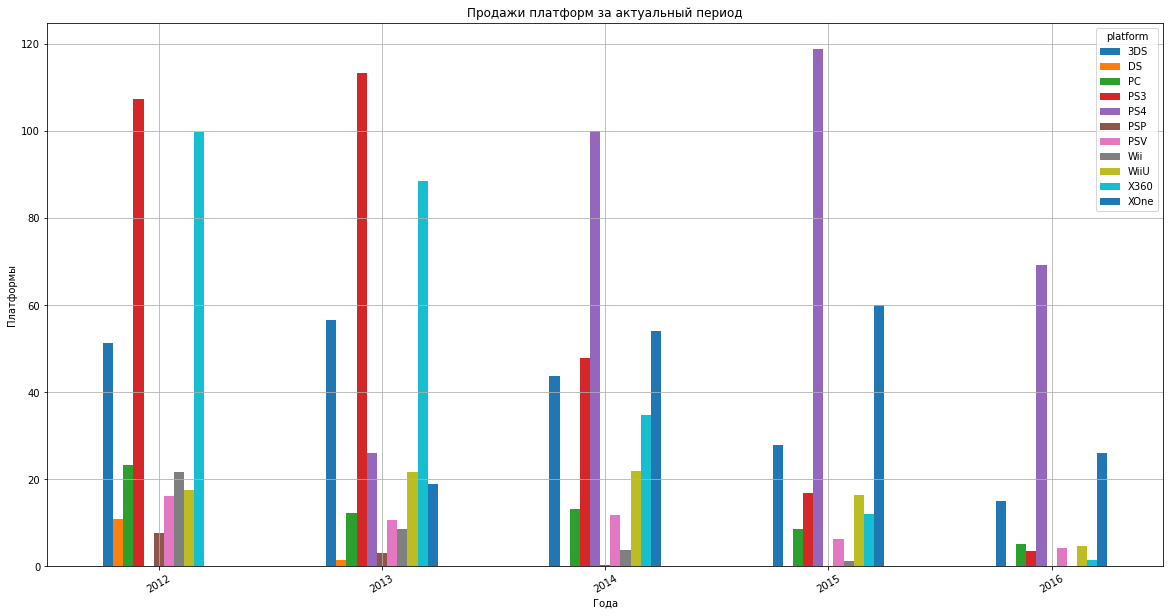

In [131]:
#Группируем и выводим таблицу платформ по суммарным продажам за актуальный период
current_stat_platform = current_period.pivot_table(index='year_of_release', values='total_sales', 
                                                   columns='platform', aggfunc='sum')
display(current_stat_platform)

#Строим график, чтобы понять, какие платформы лидируют по продажам, растут или падают
(current_stat_platform.plot(kind='bar', 
                            grid=True, 
                            figsize=(20, 10),
                            xlabel='Года', ylabel='Платформы',
                            rot=30).set_title('Продажи платформ за актуальный период')
);

#### Какие платформы лидируют по продажам, растут или падают. Несколько потенциально прибыльных платформ.

Исходя из графика, можно сказать, что в первые два рассматриваемых года (2012 - 2013) лидировали две платформы PS3 и X360 с продажами  в 107.36 и 99.74 млн. сооответственно. Тем не менее в следующие года этих лидеров сместили другие, а старые начали падать по прадажам, новыми лидерами стали - PS4 и XOne, однако абсолютным лидером с 2014 по 2016 гг явлется PS4 с продажами в 100.00, 118.90, 69.25 млн. соответсвенно, тогда как у XOne в те же года, продажи были 54.07, 60.14, 26.15 млн. соответсвенно.
Так же можно выделить платформу 3DS, которая за весь рассматриваемый акутальный период не являлась лидером, но и не находилась среди "мелких" продаж по платформам, все эти годы платформа 3DS держалась на хороших позициях. <br>

На данный момент, потенциально прибыльных платформ можно назвать несколько: <br>
• PS4 (абсолютный лидер на данный момент);<br>
• XOne (вторая по величине платформа по родажам);<br>
• 3DS (одна из "сильных" платформ, которая удреживает хорошие продажи и по сей день).

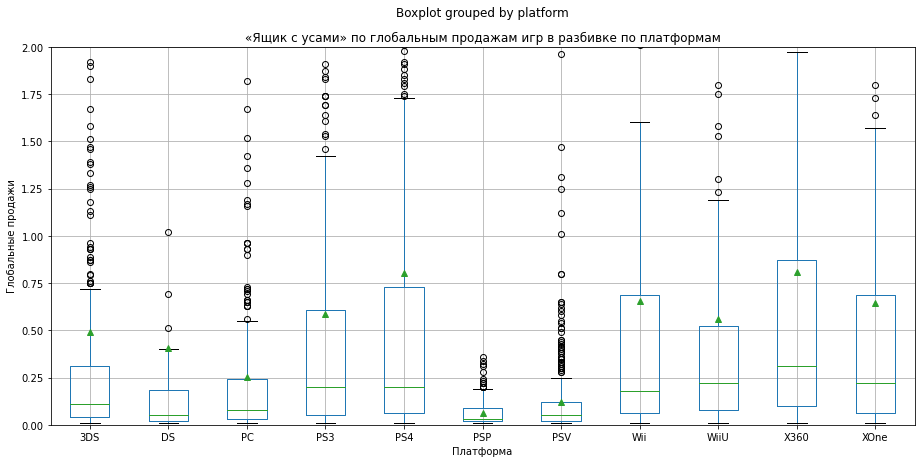

In [132]:
#Строим диаграмму размаха («ящик с усами») по глобальным продажам игр в разбивке по платформам
#current_stat_platform.boxplot(figsize=(20, 10)).set_title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам');

current_period.boxplot('total_sales', by='platform', figsize=(15, 7), showmeans=True).set_title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам');
plt.ylim([0, 2]);
plt.xlabel('Платформа');
plt.ylabel('Глобальные продажи');

#### Описываем результаты графика «ящик с усами»

Как можно увидеть на графике "ящик с усами", основными лидерами по продажам являются такие платформы, как PS4, X360, PS3, Wii, WiiU и X360. Так же на графике прослеживаются незначительные выбросы. Видно, что медиана у рассматриваемых платформ, стремится к длинному хвосту высоких значений. <br>
Опять же таки, можно отметить, что "крупными игроками" за все время являются PS4, X360, PS3, Wii, WiiU и X360. 

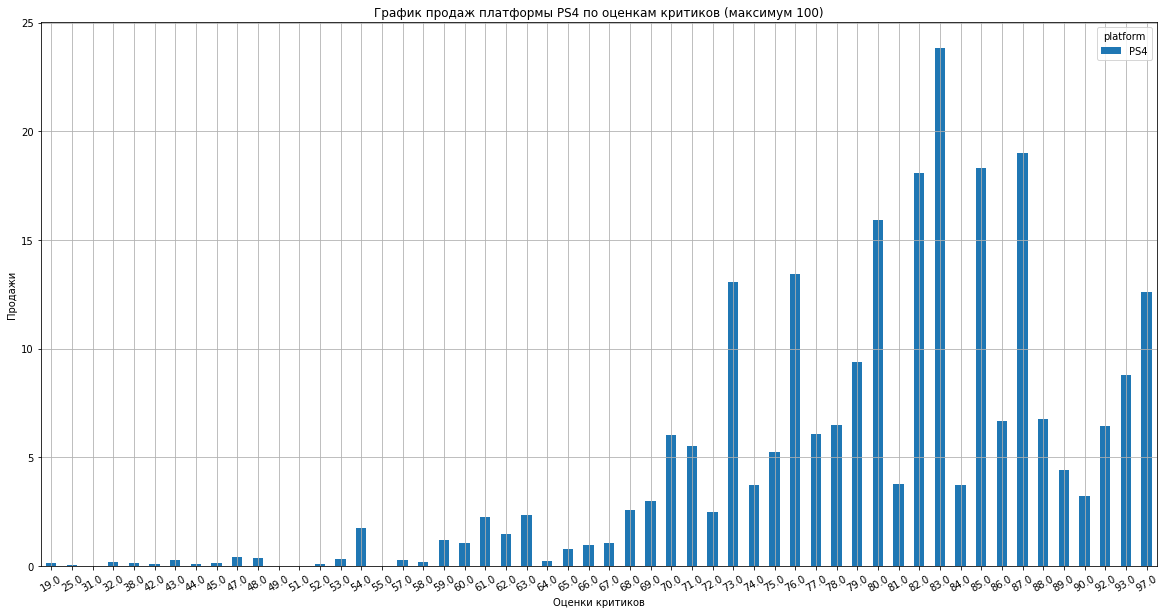

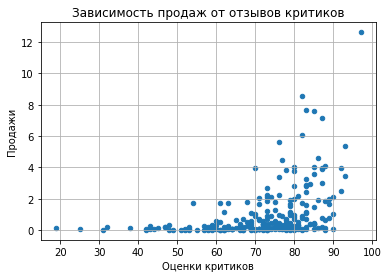

In [133]:
#Cмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков 
#(отдельно расмотрим одну и вторую оценку)
#Будем оценивать продажи на основании популярной платформы PS4
ps4_score = current_period.query('platform == "PS4"')
ps4_score.head()

#ps4_stat_score = ps4_score.pivot_table(index='year_of_release', values='total_sales', 
                                                   #columns='critic_score', aggfunc='sum')
    
#Группируем данные на основании оценок критиков
ps4_critic_score = ps4_score.pivot_table(index='critic_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    
(ps4_critic_score.plot(kind='bar', 
                            grid=True, 
                            figsize=(20, 10), 
                            xlabel='Оценки критиков', ylabel='Продажи',
                            rot=30).set_title('График продаж платформы PS4 по оценкам критиков (максимум 100)')
);

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов кртитиков
ps4_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                      xlabel='Оценки критиков', ylabel='Продажи',
                      grid=True).set_title('Зависимость продаж от отзывов критиков');

In [134]:
#Численно оценим взаимсвязь между продажами и отзывами критиков с помощью корреляции
print('Корреляция продаж c оценками критиков для PS4 составляет:', ps4_score['total_sales'].corr(ps4_score['critic_score']))

Корреляция продаж c оценками критиков для PS4 составляет: 0.406567902061781


Смотря на диаграмму рассеивания зависимости продаж PS4 от отзывов критиков можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. Основные продажи приходятся на рейтинг от 40 до 90. При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Можно найти уникальные примеры  когда при средннем рейтинге(53-70), достататочно большое количество продаж. Однако есть и совсем пустые зоны: например при среднем рейтинге 50 от критиков, продажи не превышают более 2 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от кртиков, тем больше продажи. 


Корреляция продаж c оценками критиков для PS4 в 0.41 говорит о наличии слабой линейной связи, то есть не всегда увеличение рейтинга сопровождается увеличением продаж.

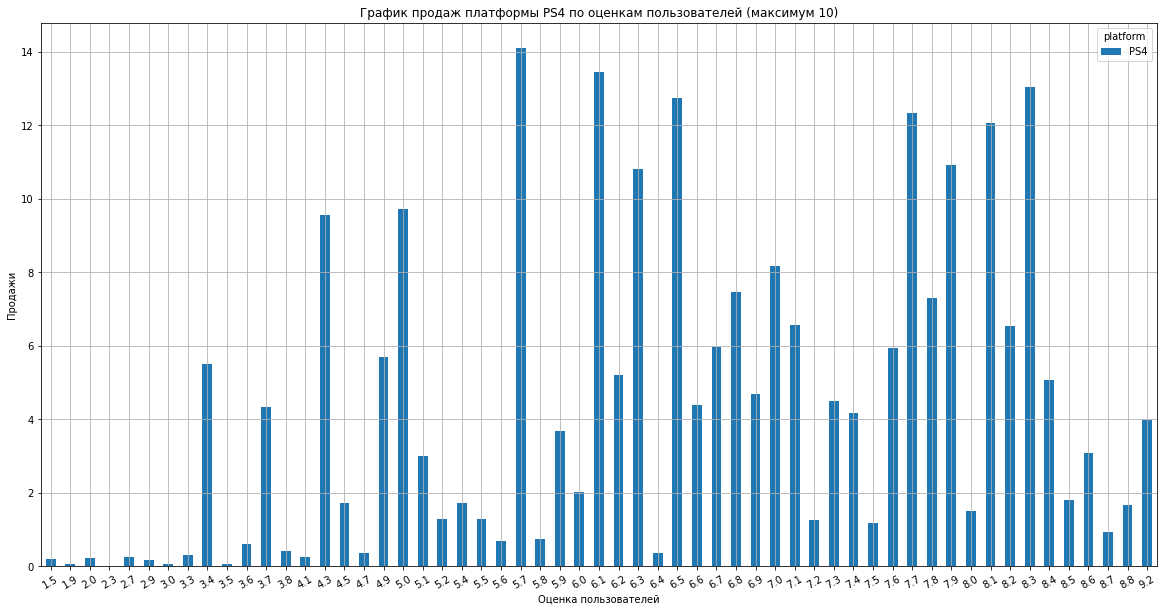

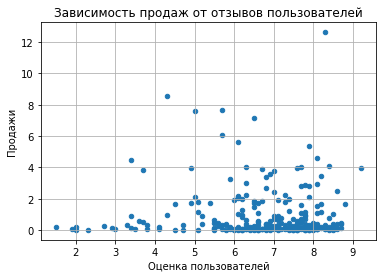

In [135]:
#Группируем данные на основании оценок пользователей
ps4_user_score = ps4_score.pivot_table(index='user_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    
(ps4_user_score.plot(kind='bar', 
                            grid=True, 
                            figsize=(20, 10), 
                            xlabel='Оценка пользователей', ylabel='Продажи', 
                            rot=30).set_title('График продаж платформы PS4 по оценкам пользователей (максимум 10)')
);

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов пользователей
ps4_score.plot(x='user_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка пользователей', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж от отзывов пользователей');

In [136]:
#Численно оценим взаимсвязь между продажами и отзывами пользователей с помощью корреляции
print('Корреляция продаж c оценками пользователей для PS4 составляет:', ps4_score['total_sales'].corr(ps4_score['user_score']))

Корреляция продаж c оценками пользователей для PS4 составляет: -0.031957110204556376


Смотря на диаграмму рассеивания зависимости продаж PS4 от отзывов пользователей можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Большинство точек все равн сосредоточенно на том, что чем больше рейтинг пользователей - продажи остаются на уровне продаж до 2 млн., как и при низком рейтинге. Можно найти уникальные примеры  когда при средннем рейтинге достаточно большое количество продаж. Однако есть и совсем пустые зоны: например при среднем рейтинге 3 пользователей, продажи не превышают более 1.5 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от пользователей, тем больше продажи, но так бывает далеко не всегда.


Отрицательная корреляция продаж c оценками пользователей для PS4 в -0.03 говорит о наличии слабой линейной связи, которая и вовсе может отсутствовать, то есть не всегда увеличение рейтинга сопровождается увеличением продаж. 
Коэффициент корреляции отрицательный, то есть рост одной величины связан с уменьшением другой -  это мы и наблюдаем на графике, 
рост рейтинга пользователей далеко не всегда сопровождается увеличением продаж, наоборот, продажи начинают "падать", то есть не увеличиваться, а наоборот приходить к такому же количеству продаж, когда рейтинг пользователй был мал. То сеть линейная связь очень мала или вовсе отсутствует. 

#### Соотнесем выводы с продажами игр на других ведущих платформах: PS3, X360, XOne и 3DS

# Платформа 3DS

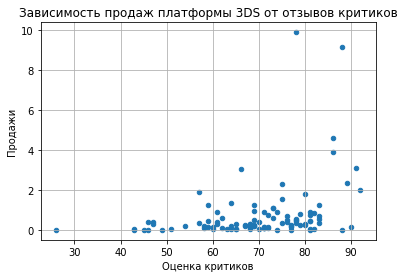

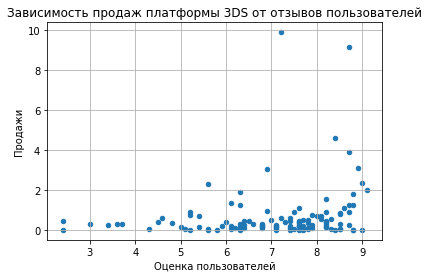

In [137]:
#Строим диаграммы рассеивания и считаем коэффициент корреляции для других топовых платформ и сравниваем выводы
ds3_score = current_period.query('platform == "3DS"')
ds3_score.head()

    
#Группируем данные на основании оценок критиков
ds3_critic_score = ds3_score.pivot_table(index='critic_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    


#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов кртитиков
ds3_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка критиков', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы 3DS от отзывов критиков');


#Группируем данные на основании оценок пользователей
ds3_user_score = ds3_score.pivot_table(index='user_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов пользователей
ds3_score.plot(x='user_score', y='total_sales', kind='scatter',
                      xlabel='Оценка пользователей', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы 3DS от отзывов пользователей');

In [138]:
#Численно оценим взаимсвязь между продажами и отзывами критиков с помощью корреляции
print('Корреляция продаж c оценками критиков для 3DS составляет:', ds3_score['total_sales'].corr(ds3_score['critic_score']))

#Численно оценим взаимсвязь между продажами и отзывами пользователей с помощью корреляции
print('Корреляция продаж c оценками пользователей для 3DS составляет:', ds3_score['total_sales'].corr(ds3_score['user_score']))

Корреляция продаж c оценками критиков для 3DS составляет: 0.32080286953607845
Корреляция продаж c оценками пользователей для 3DS составляет: 0.19758263411038596


Смотря на диаграмму рассеивания зависимости продаж 3DS от отзывов критиков можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. Основные продажи приходятся на рейтинг от 40 до 80. При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Можно найти уникальные примеры  когда при средннем рейтинге(от 55 до 70), достататочно большое количество продаж. Однако есть и совсем пустые зоны: например при среднем рейтинге 50 от критиков, продажи не превышают более 1.5 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от критиков, тем больше продажи. 

Смотря на диаграмму рассеивания зависимости продаж 3DS от отзывов пользователей можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Большинство точек все равно сосредоточенно на том, что чем больше рейтинг пользователей - продажи остаются на уровне продаж до 2 млн., как и при низком рейтинге. Можно найти уникальные примеры  когда при средннем рейтинге (от 5 до 7) достаточно большое количество продаж. Однако есть и совсем пустые зоны: например при среднем рейтинге до  5 пользователей, продажи не превышают более 1.5 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от пользователей, тем больше продажи, но так бывает далеко не всегда.



Корреляция продаж c оценками критиков для 3DS в 0.32 говорит о наличии слабой линейной связи, то есть не всегда увеличение рейтинга сопровождается увеличением продаж.

Корреляция продаж c оценками пользователей для 3DS в 0.2 говорит о том, что линейная связь очень мала или вовсе отсутствует.
То есть далеко не всегда большие продажи зависят от высоких рейтингов.

# Платформа PS3

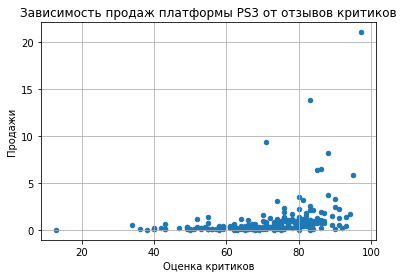

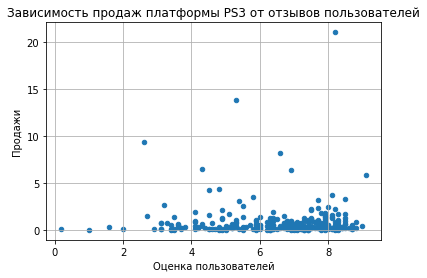

In [139]:
#Строим диаграммы рассеивания и считаем коэффициент корреляции для других топовых платформ и сравниваем выводы
ps3_score = current_period.query('platform == "PS3"')
ps3_score.head()

    
#Группируем данные на основании оценок критиков
ps3_critic_score = ps3_score.pivot_table(index='critic_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    


#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов кртитиков
ps3_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка критиков', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы PS3 от отзывов критиков');


#Группируем данные на основании оценок пользователей
ps3_user_score = ps3_score.pivot_table(index='user_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов пользователей
ps3_score.plot(x='user_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка пользователей', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы PS3 от отзывов пользователей');

In [140]:
#Численно оценим взаимсвязь между продажами и отзывами критиков с помощью корреляции
print('Корреляция продаж c оценками критиков для PS3 составляет:', ps3_score['total_sales'].corr(ps3_score['critic_score']))

#Численно оценим взаимсвязь между продажами и отзывами пользователей с помощью корреляции
print('Корреляция продаж c оценками пользователей для PS3 составляет:', ps3_score['total_sales'].corr(ps3_score['user_score']))

Корреляция продаж c оценками критиков для PS3 составляет: 0.3314972592629587
Корреляция продаж c оценками пользователей для PS3 составляет: -0.005143522887113828


Смотря на диаграмму рассеивания зависимости продаж PS3 от отзывов критиков можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. Основные продажи приходятся на рейтинг от 60 до 80. При этом с увеличением рейтинга увеличиваются и сами продажи. Основные продажи от 2 до 4 млн приходятся на высокий рейтинг от 60 до 90. То есть, на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от критиков, тем больше продажи. 

Смотря на диаграмму рассеивания зависимости продаж PS3 от отзывов пользователей можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами (рейтинг от 6 до 8). При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Можно найти уникальные примеры  когда при средннем рейтинге (от 3 до 6) достаточно большое количество продаж(4 млн. и выше). Однако есть и совсем пустые зоны: например при среднем рейтинге до 2 пользователей, продажи не превышают более 1 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от пользователей, тем больше продажи, но так бывает далеко не всегда.


Корреляция продаж c оценками критиков для PS3 в 0.33 говорит о наличии слабой линейной связи, то есть не всегда увеличение рейтинга сопровождается увеличением продаж.

Отрицательная корреляция продаж c оценками пользователей для PS3 в -0.01 говорит о наличии слабой линейной связи, которая и вовсе может отсутствовать, то есть не всегда увеличение рейтинга сопровождается увеличением продаж. 
Коэффициент корреляции отрицательный, то есть рост одной величины связан с уменьшением другой -  это мы и наблюдаем на графике, 
рост рейтинга пользователей далеко не всегда сопровождается увеличением продаж, наоборот, продажи начинают "падать", то есть не увеличиваться, а наоборот приходить к такому же количеству продаж, как при среднем рейтинге. То сеть линейная связь очень мала или вовсе отсутствует. 

# Платформа X360

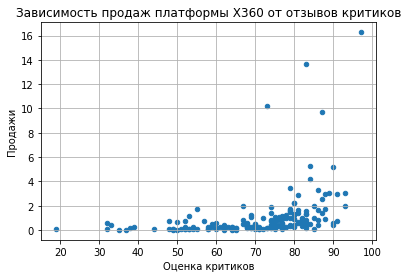

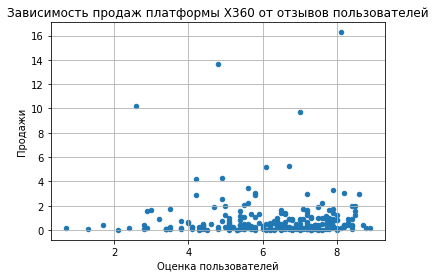

In [141]:
#Строим диаграммы рассеивания и считаем коэффициент корреляции для других топовых платформ и сравниваем выводы
x360_score = current_period.query('platform == "X360"')
x360_score.head()

    
#Группируем данные на основании оценок критиков
x360_critic_score = x360_score.pivot_table(index='critic_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    


#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов кртитиков
x360_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка критиков', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы X360 от отзывов критиков');


#Группируем данные на основании оценок пользователей
x360_user_score = x360_score.pivot_table(index='user_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов пользователей
x360_score.plot(x='user_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка пользователей', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы X360 от отзывов пользователей');

In [142]:
#Численно оценим взаимсвязь между продажами и отзывами критиков с помощью корреляции
print('Корреляция продаж c оценками критиков для X360 составляет:', x360_score['total_sales'].corr(x360_score['critic_score']))

#Численно оценим взаимсвязь между продажами и отзывами пользователей с помощью корреляции
print('Корреляция продаж c оценками пользователей для X360 составляет:', x360_score['total_sales'].corr(x360_score['user_score']))

Корреляция продаж c оценками критиков для X360 составляет: 0.36057348885073365
Корреляция продаж c оценками пользователей для X360 составляет: 0.0061639786462133256


Смотря на диаграмму рассеивания зависимости продаж X360 от отзывов критиков можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами. Основные продажи приходятся на рейтинг от 70 до 85. При этом с увеличением рейтинга увеличиваются и сами продажи. Крупные продажи от 2 до 4 млн приходятся на высокий рейтинг от 80 до 90. То есть, на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от критиков, тем больше продажи. 

Смотря на диаграмму рассеивания зависимости продаж X360 от отзывов пользователей можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами (рейтинг от 6 до 8). При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. Можно найти уникальные примеры  когда при средннем рейтинге (от 4 до 7) достаточно большое количество продаж(2 млн. и выше). Однако есть и совсем пустые зоны: например при среднем рейтинге до 2 пользователей, продажи не превышают более 1 млн. То есть, опять же таки на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от пользователей, тем больше продажи, но так бывает далеко не всегда.


Корреляция продаж c оценками критиков для X360 в 0.36 говорит о наличии слабой линейной связи, то есть не всегда увеличение рейтинга сопровождается увеличением продаж.

Корреляция продаж c оценками пользователей для X360 в 0.1 говорит о том, что линейная связь очень мала или вовсе отсутствует. То есть далеко не всегда большие продажи зависят от высоких рейтингов.

# Платформа XOne

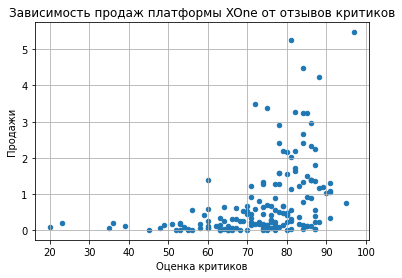

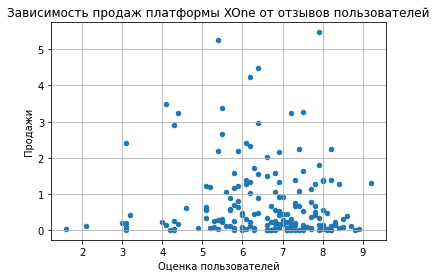

In [143]:
#Строим диаграммы рассеивания и считаем коэффициент корреляции для других топовых платформ и сравниваем выводы
xone_score = current_period.query('platform == "XOne"')
xone_score.head()

    
#Группируем данные на основании оценок критиков
xone_critic_score = xone_score.pivot_table(index='critic_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    


#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов кртитиков
xone_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка критиков', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы XOne от отзывов критиков');


#Группируем данные на основании оценок пользователей
xone_user_score = xone_score.pivot_table(index='user_score', values='total_sales', 
                                                   columns='platform', aggfunc='sum')    
    

#Строим диаграмму рассеивания, которая покажет зависимость продаж от отзывов пользователей
xone_score.plot(x='user_score', y='total_sales', kind='scatter', 
                      xlabel='Оценка пользователей', ylabel='Продажи', 
                      grid=True).set_title('Зависимость продаж платформы XOne от отзывов пользователей');

In [144]:
#Численно оценим взаимсвязь между продажами и отзывами критиков с помощью корреляции
print('Корреляция продаж c оценками критиков для XOne составляет:', xone_score['total_sales'].corr(xone_score['critic_score']))

#Численно оценим взаимсвязь между продажами и отзывами пользователей с помощью корреляции
print('Корреляция продаж c оценками пользователей для XOne составляет:', xone_score['total_sales'].corr(xone_score['user_score']))

Корреляция продаж c оценками критиков для XOne составляет: 0.41699832800840175
Корреляция продаж c оценками пользователей для XOne составляет: -0.06892505328279412


Смотря на диаграмму рассеивания зависимости продаж XOne от отзывов критиков можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами(рейтинг от 70 до 80). С увеличением рейтинга увеличиваются и сами продажи - как раз большие продажи от 2 до 5 млн приходятся на высокий рейтинг от 75 до 90. То есть, на графике можно увидеть взаимосвязь между двумя величинами - чем выше рейтинг от критиков, тем больше продажи. 

Смотря на диаграмму рассеивания зависимости продаж XOne от отзывов пользователей можно сказать о том, что есть основная масса точек с наиболее частыми сочетаниями рейтинга и продажами (рейтинг от 6.5 до 7.5). При этом с увеличением рейтинга увеличиваются и сами продажи. Но это лишь в среднем. В данной платформе высокие продажи (от 3 до 5 млн.) приходятся на рейтинг от 4 до 8. То есть мы можем увидеть слабую взаимосвязь между двумя величинами - не всегда чем выше рейтинг от пользователей, тем больше продажи.


Корреляция продаж c оценками критиков для XOne в 0.42 говорит о наличии линейной связи, однако не слишком сильной, то есть не всегда увеличение рейтинга сопровождается увеличением продаж.

Отрицательная корреляция продаж c оценками пользователей для XOne в -0.07 говорит о наличии слабой линейной связи, которая и вовсе может отсутствовать, то есть не всегда увеличение рейтинга сопровождается увеличением продаж. 
Коэффициент корреляции отрицательный, то есть рост одной величины связан с уменьшением другой -  это мы и наблюдаем на графике, 
рост рейтинга пользователей далеко не всегда сопровождается увеличением продаж,  и наоборот, не всегда рост продаж сопровождается ростом пользовательского рейтинга. То сеть линейная связь очень мала или вовсе отсутствует. 

#### Общий вывод о зависмости между отзывами и продажами на популярных платформах
Мы построили диаграммы рассеиваний и посчитали коэффициент корреляции для всех популярных платформ.
Можно заметить, что коэффициент корреляции с оценками критиков на всех платформах намного выше коэффициента корреляции c оценками пользователей. Так же можно заметить, что везде зависимость продаж от оценок пользователей очень мала или вообще не имеет зависимости.
Можно сказать, что на эффективные продажи платформ достаточно влияют оценки и рейтинг от критиков. Это неудивительно, так как обычно пользователи прислушиваются к профессиональному мнению, прежде чем потратить деньги на покупку игры.
Так же можно заметить, что платформы с низким рейтингом - меньше всего продают, нежели тогда, когда рейтинг пользователей/критиков набирает обороты. То есть зависимость между ростом рейтинга и ростом продаж - прослеживается у всех платформ. 

In [145]:
#Посмотрите на общее распределение игр по жанрам. 
#Что можно сказать о самых прибыльных жанрах? 
#Выделяются ли жанры с высокими и низкими продажами?
#Группируем и изучаем на общее распределение игр по жанрам
current_stat_genre = current_period.pivot_table(index='genre', 
                                                values=['total_sales', 'name'],
                                                aggfunc={'total_sales':'sum', 'name':'count'})
#Считаем прибыль 
current_stat_genre['genre_pofit'] = current_stat_genre['total_sales']/current_stat_genre['name']

display(current_stat_genre.sort_values(by='total_sales', ascending=False))

,name,total_sales,genre_pofit
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,268,181.07,0.675634
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


,name,total_sales,genre_pofit
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,268,181.07,0.675634
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


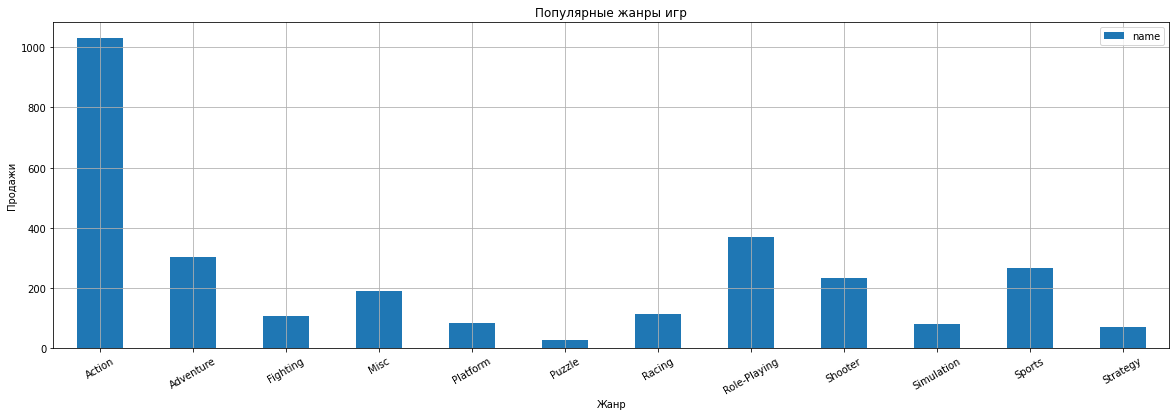

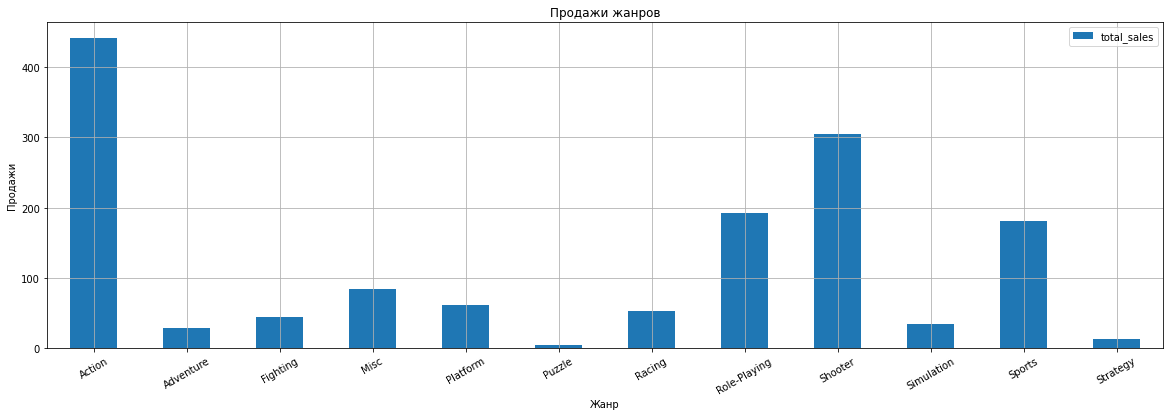

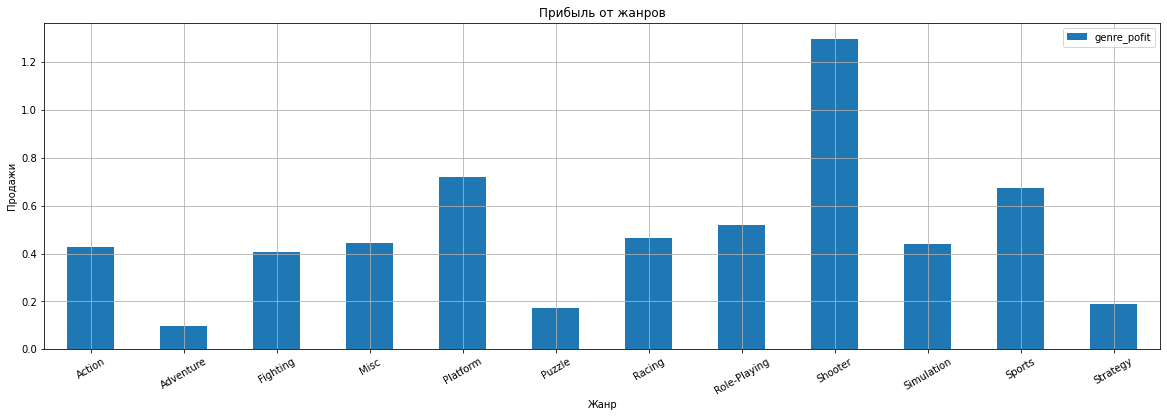

In [146]:
#Группируем и изучаем на общее распределение игр по жанрам
current_stat_genre = current_period.pivot_table(index='genre', 
                                                values=['total_sales', 'name'],
                                                aggfunc={'total_sales':'sum', 'name':'count'})
#Считаем прибыль 
current_stat_genre['genre_pofit'] = current_stat_genre['total_sales']/current_stat_genre['name']

display(current_stat_genre.sort_values(by='total_sales', ascending=False))

#Строим график, чтобы понять, какие самые популярные жанры
(current_stat_genre.plot(kind='bar', 
                            y='name',
                            grid=True, 
                            figsize=(20, 6),
                            xlabel='Жанр', ylabel='Продажи', 
                            rot=30).set_title('Популярные жанры игр')
);

#Строим график, чтобы понять, какие продажи у жанров
(current_stat_genre.plot(kind='bar', 
                            y='total_sales',
                            grid=True, 
                            figsize=(20, 6),
                            xlabel='Жанр', ylabel='Продажи', 
                            rot=30).set_title('Продажи жанров')
);

#Строим график, чтобы понять, какие самые прибыльные жанры
(current_stat_genre.plot(kind='bar', 
                            y='genre_pofit',
                            grid=True, 
                            figsize=(20, 6), 
                            xlabel='Жанр', ylabel='Продажи', 
                            rot=30).set_title('Прибыль от жанров')
);

#### Популярные и прибыльные жанры, а так же жанры с высокими и низкими продажами

Самым популярным жанром игры является Action (упоминаемость 1 031 раз), далее по популярности идут Role-Playing и Adventure (упоминаемость 370 и 302 раза, соответственно). Самым непопулярным жанром является Puzzle (упоминаемость 28 раз).
Самыми продаваемыми жанрами являются Action (441.12 млн.), Shooter (304.73 млн.) и Role-Playing (192.80 млн.). Жанрами с самыми низкими продажами являются Puzzle (4.89	 млн.) и Strategy (13.34 млн.).
Однако самым прибыльным жанром является Shooter, далее идут жанры практически с одинаковой прибылью - Platform и Sports.

#### Вывод
Мы провели полноценный исследовательский анализ данных:
1. Мы посмотрели, сколько игр выпускалось в разные годы
2. Мы посмотрели, как менялись продажи по платформам
3. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам
4. Изучили за какой характерный срок появляются новые и исчезают старые платформы
5. Определили акутальный период
6. Изучили какие платформы лидируют по продажам, растут или падают. Выбрали несколько потенциально прибыльных платформ
7. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описали результат
8. Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
9. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами, а так же сформулировали выводы
10. Соотнесли выводы с продажами игр на других платформах
11. Посмотрели на общее распределение игр по жанрам. 

###  Составьте портрет пользователя каждого региона

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


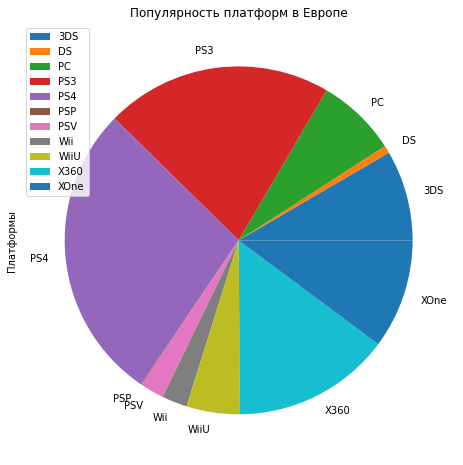

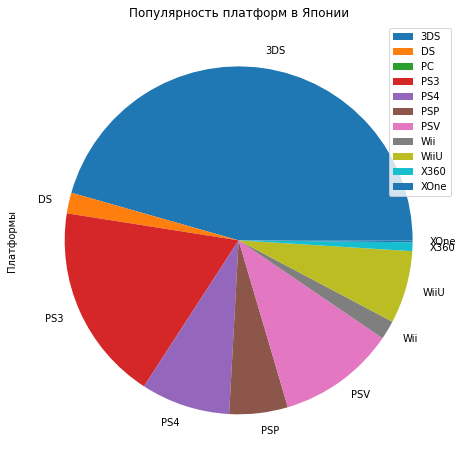

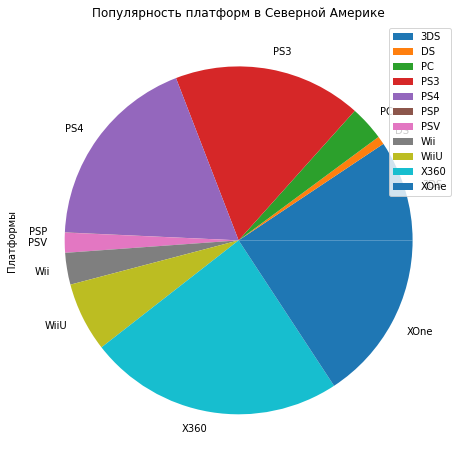

In [147]:
#Группируем и изучаем cамые популярные платформы для каждого региона
current_region_platform = current_period.pivot_table(index='platform', 
                                                values=['na_sales', 'eu_sales', 'jp_sales'],
                                                aggfunc='sum')

display(current_region_platform)

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Европе
(current_region_platform.plot(kind='pie', 
                            y='eu_sales', 
                            ylabel='Платформы', 
                            figsize=(8, 8))
                            .set_title('Популярность платформ в Европе')
);

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Японии
(current_region_platform.plot(kind='pie', 
                            y='jp_sales',
                            ylabel='Платформы',
                            figsize=(8, 8)) 
                            .set_title('Популярность платформ в Японии')
);

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Северной Америке
(current_region_platform.plot(kind='pie', 
                            y='na_sales', 
                            ylabel='Платформы',
                            figsize=(8, 8))
                            .set_title('Популярность платформ в Северной Америке')
);

• Самыми популярными платформами в Европе являются PS4 и PS3 с продажами 141.09 и 106.86 млн. соответственно. Далее по популярности идет платформа X360 с продажами в 74.52 млн. Замыкающими по популярности (4 и 5 место) платформами являются XOne и 3DS с продажами в 51.59 и 42.64 соответственно. <br>
• Самой популярной платформой в Японии является 3DS с продажами в 87.79	млн. Далее по популярности идут платформы PS3 (35.29 млн.), PSV (21.04	млн.), PS4 (15.96 млн.) и замыкает топ 5 популярных платформ в Японии - платформа WiiU (продажи 13.01 млн.)<br>
• Самыми популярными платформами в Северной Америке являются X360 и PS4 с продажами 140.05 и 108.74 млн. соответственно. Далее по популярности идет платформа PS3 с продажами в 103.38 млн. Замыкающими по популярности (4 и 5 место) платформами являются XOne и 3DS с продажами в 93.12 и 55.31 соответственно.<br>

Можно сказать, что для трех разных регионов все равно присуще общие лидеры по платформам. В каждом регионе популярны платформы PS4, PS3 и 3DS. Очень схожи клиентские интересы по популярности платформ в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы. 

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


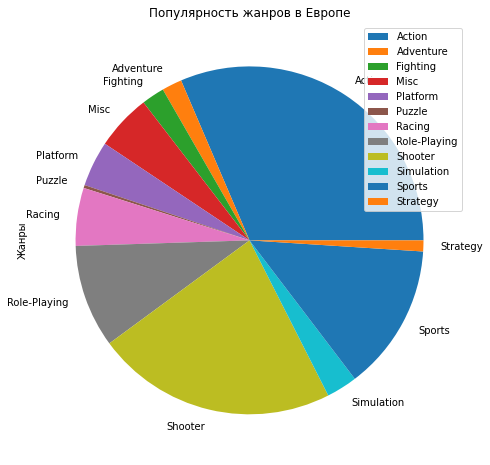

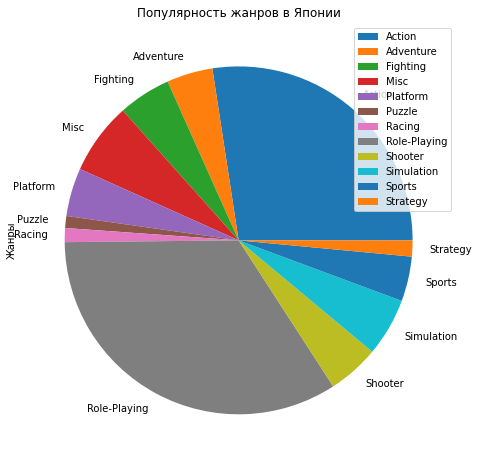

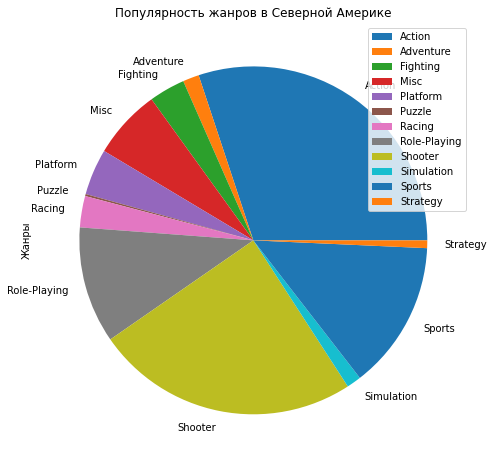

In [148]:
#Группируем и изучаем cамые популярные жанры для каждого региона
current_region_genre = current_period.pivot_table(index='genre', 
                                                values=['na_sales', 'eu_sales', 'jp_sales'],
                                                aggfunc='sum')

display(current_region_genre)

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Северной Америке
(current_region_genre.plot(kind='pie', 
                            y='eu_sales', 
                            ylabel='Жанры',
                            figsize=(8, 8))
                            .set_title('Популярность жанров в Европе')
);

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Европе
(current_region_genre.plot(kind='pie', 
                            y='jp_sales', 
                            ylabel='Жанры',
                            figsize=(8, 8)) 
                            .set_title('Популярность жанров в Японии')
);

#Строим круговую диаграмму, чтобы понять, какие самые популярные платформы в Японии
(current_region_genre.plot(kind='pie', 
                            y='na_sales', 
                            ylabel='Жанры',
                            figsize=(8, 8))
                            .set_title('Популярность жанров в Северной Америке')
);

• Самыми популярными жанрами в Европе являются Action и Shooter (продажи 159.34 и 113.47 млн. соответственно), далее по популярности идут жанры Sports	(69.09 млн.), Role-Playing (48.53 млн.) и Racing (27.29 млн.). <br>
• Самыми популярными жанрами в Японии являются Role-Playing	и Action (продажи 65.44 и 52.80 млн. соответственно), далее по популярности идут жанры Misc (12.86 млн.), Simulation (10.41 млн.) и Fighting (9.44 млн.).<br>
• Самыми популярными жанрами в Северной Америке являются Action и Shooter (продажи 177.84 и 144.77 млн. соответственно), далее по популярности идут жанры Sports (81.53 млн.), Role-Playing (64.00 млн.) и Misc (38.19 млн.).<br>

Общая картина с жанрами схожа с общей картиной по платформам - в каждом регионе очень популярен жанр Action и Role-Playing. Очень схожи клиентские интересы по популярности жанров в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы.

In [149]:
#Группируем и изучаем влияет ли рейтинг ESRB на продажи в отдельном регионе
current_region_rating = current_period.pivot_table(index='rating', 
                                                values=['na_sales', 'eu_sales', 'jp_sales'],
                                                aggfunc='sum')

display(current_region_rating)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
no_rating,91.50,108.84,103.31


В нашей таблице присутствует 4 типа рейтинга ESRB: <br>
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.<br>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».<br>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.<br>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. <br>

• Самым популярным рейтингом ESRB по продажам в Европе явлется «M» («Mature») — «Для взрослых», далее по популярности идет «E» («Everyone») — «Для всех». Самым непопулярным рейтингом ESRB в Европе является «T» («Teen») — «Подросткам».<br>

• Самым популярным рейтингом ESRB по продажам в Японии явлется «E» («Everyone») — «Для всех», далее по популярности идет «T» («Teen») — «Подросткам». Самым непопулярным рейтингом ESRB в Японии является «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».<br>

• Самым популярным рейтингом ESRB по продажам в Северной Америке явлется «M» («Mature») — «Для взрослых», далее по популярности идет «E» («Everyone») — «Для всех». Самым непопулярным рейтингом ESRB в Северной Америке является «T» («Teen») — «Подросткам».<br>


Можно сказать, что для всех регионов популярен по продажам тип рейтинга E. Одинаковы клиентские интересы по популярности продаж тип рейтинга ESRB в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы.

####  Вывод
Мы составили портрет пользователя каждого региона:
1. Определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и описали различия
2. Определили для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5) и описали разницу
3. Определили для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи в отдельном регионе

###  Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC<br>
H_a:  Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC<br>
alpha = 0.05

In [150]:
#Проверяем статистические данные пользователей Xbox One и PC 
average_score_xone = current_period.query('platform == "XOne"')
average_score_xone = average_score_xone[average_score_xone['user_score'].notna()]
average_score_xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [151]:
average_score_pc = current_period.query('platform == "PC"')
average_score_pc = average_score_pc[average_score_pc['user_score'].notna()]
average_score_pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Средние двух выборок практически одинаковы. 

In [152]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(average_score_xone['user_score'], average_score_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось, действительно, средние пользовательские рейтинги платформ Xbox One и PC практически одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>
H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports<br>
H_a: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports<br>
alpha = 0.05

In [153]:
#Проверяем статистические данные пользователей жанров Action и Sports
average_score_action = current_period.query('genre == "Action"')
average_score_action = average_score_action[average_score_action['user_score'].notna()]
average_score_action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [154]:
average_score_sports = current_period.query('genre == "Sports"')
average_score_sports = average_score_sports[average_score_sports['user_score'].notna()]
average_score_sports['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Средние двух выборок немного отличаются. 

In [155]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(average_score_action['user_score'], average_score_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


В итоге мы принимаем альтернативную гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам мы проверяли на основании t-теста.

Какой критерий применили для проверки гипотез:
Сначала формулируется нулевая гипотеза H₀. Например, «среднее рассматриваемой генеральной совокупности равно
A», где А — некоторое число. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ она звучит как «среднее генеральной совокупности не равно A». H₀ всегда формулируется так, чтобы использовать знак равенства. 
С помощью данных критериев были сформированы гипотезы.

#### Вывод
В данном разделе о проверке гипотез:
1. Мы проверили гипотезы
2. Задали самостоятельно пороговое значение alpha
3. Объяснили как мы сформулировали нулевую и альтернативную гипотезы и какой критерий применили для проверки гипотез и почему

###  Общий вывод

1.	Мы ознакомились с представленным датафреймом. 



2.	Мы провели полноценную предобработку данных: <br>
•	Проверили столбцы на наличие дубликатов<br>
•	Проверили столбцы на уникальные значения<br>
•	Привели названия столбцов к нижнему регистру<br>
•	Провели замену типа данных, где это требовалось<br>
•	Заменили пропущенные значения там, где это было возможно<br>
•	Провели анализ аббревиатуры "tbt"<br>
•	Добавили новый столбец в таблицу<br>
•	Установили возможные причины пропусков в значениях<br>



3.	Мы провели полноценный исследовательский анализ данных:
До 1995 года выпускалось меньше 200 игр, после 1995 года мы видим наращивание выпусков игр каждый год, пик выпуска игр приходится на 2008-2009 года, в это время выпустили 1 427 и 1 426 игр соответсвенно. После пошел спад и в период с 2012 по 2016 года мы наблюдаем однорудную тенденцию выпуска игр - примерно 500-600 игр за год. <br>
"Большие" продажи платформ начались с 1995 года и продолжались до 2010 года, однако с 2010 года,  - продаж стало меньше. Пик продаж на платформах пришелся на 2008 год. Самые большие продажи пришлись на период с 2006 по 2011 год - как раз то время, когда выпускалось много игр. <br>
Мы выявили топ-10 платформ с самыми большими продажами: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. Самыми популярными из них считаются PS2, X360, PS3. <br>
Рассматривая 2016 год, можно заменить, что популярность по продажам приобрела "новая" платформа PS4, которая не появлялась до этого среди популярных платформ, так же можно заметить, что эта платформа в последние четыре года набирает обороты и обгоняет своих конкурентов по продажам. <br>
Актуальным периодом, стали считать данные за последние 5 лет (с 2012 по 2016гг). <br>

На данный момент, потенциально прибыльных платформ можно назвать несколько: <br>
• PS4 (абсолютный лидер на данный момент); <br>
• XOne (вторая по величине платформа по родажам); <br>
• 3DS (одна из "сильных" платформ, которая удреживает хорошие продажи и по сей день). <br>
По результатам  графика «ящик с усами» опять же таки, можно отметить, что "крупными игроками" за все время являются  PS4, X360, PS3, Wii, WiiU и X360.  <br> 
Мы построили диаграммы рассеиваний и посчитали коэффициент корреляции для всех популярных платформ. Можно заметить, что коэффициент корреляции с оценками критиков на всех платформах намного выше коэффициента корреляции c оценками пользователей. Так же можно заметить, что везде зависимость продаж от оценок пользователей очень мала или вообще не имеет зависимости. Можно сказать, что на эффективные продажи платформ достаточно влияют оценки и рейтинг от критиков. Так же можно заметить, что платформы с низким рейтингом - меньше всего продают, нежели тогда, когда рейтинг пользователей/критиков набирает обороты. То есть зависимость между ростом рейтинга и ростом продаж - прослеживается у всех платформ. <br>
Самым популярным жанром игры является Action (упоминаемость 1 031 раз), далее по популярности идут Role-Playing и Adventure (упоминаемость 370 и 302 раза, соответственно). Самым непопулярным жанром является Puzzle (упоминаемость 28 раз). Самыми продаваемыми жанрами являются Action (441.12 млн.), Shooter (304.73 млн.) и Role-Playing (192.80 млн.). Жанрами с самыми низкими продажами являются Puzzle (4.89 млн.) и Strategy (13.34 млн.). Однако самым прибыльным жанром является Shooter, далее идут жанры практически с одинаковой прибылью - Platform и Sports. <br>
В каждом рассматриваемом регионе популярны платформы PS4, PS3 и 3DS. Очень схожи клиентские интересы по популярности платформ в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы. <br>
Общая картина с жанрами схожа с общей картиной по платформам - в каждом регионе очень популярен жанр Action и Role-Playing. Очень схожи клиентские интересы по популярности жанров в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы. <br>
Можно сказать, что для всех регионов популярен по продажам тип рейтинга E. Одинаковы клиентские интересы по популярности продаж тип рейтинга ESRB в Европе и Северной Америке. Так же можно заметить, что большинство продаж приходится на регионы Северной Америки и Европы. <br>

4.	Мы проверили гипотезы
Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам мы проверяли на основании t-теста. <br>

Рекоменадации: <br>
Для того, чтобы продукт был успешен и хорошо продаваем, необходимо сконцентрироваться на продажу компьютерных игр с жанрами  Action, Role-Playing и Adventure и с типом рейтинга ESRB - E. Так же для продвижения и хорошей продажи продукта - необходима реклама, а точнее, необходима реклама, которая принесет много хороших отзывов от критиков, так как чем выше отзывы критиков, тем эффективнее идет продажа.
Необходимо сконцентрировать внимание на таких крупных игроков как платформы PS4, PS3 и 3DS  - это те платформы, которые  в ближайшее время будут на пике популярности. 